<a href="https://colab.research.google.com/github/LokiAndere/ML-tutties/blob/main/simpleFCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Mar 17 11:44:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [8]:
import keras.backend as BCKN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.layers import Dropout, Flatten, Dense, DepthwiseConv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization as BN
from keras.layers import ReLU, Softmax
from keras.utils.vis_utils import plot_model

In [23]:
def model_autis_v01(shape, num_class):
    inputs = Input(shape)
    x = inputs
    # Ahora definimos las diferentes capas de la red
    # Capa convolución
    # Capa pooling
    # Capa dropout
    x = Conv2D(16, (3, 3), activation="relu")(x)
    x = Conv2D(16, (3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation="relu")(x)
    x = Conv2D(64, (3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(64, (3, 3), activation="relu")(x)
    x = Conv2D(128, (3, 3), activation="relu")(x)
    x = BatchNormalization()(x)
    # Capas completamente conectadas
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    x = Dense(num_class, activation="softmax")(x)
    outputs = x
    model = Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model

In [24]:
def FCNN_L(shape, num_classes):
    first = Input(shape)

    model = Conv2D(16, (3, 3)) (first)
    model = ReLU() (model)
    model = Conv2D(16, (3, 3)) (model)
    model = ReLU() (model)
    model = Conv2D(16, (2, 2), strides = 2) (model)

    model = Conv2D(64, (3, 3)) (model)
    model = ReLU() (model)
    model = Conv2D(64, (3, 3)) (model)
    model = ReLU() (model)
    model = Conv2D(64, (2, 2), strides = 2) (model)

    model = Dropout(0.2) (model)

    model = Conv2D(64, (3, 3)) (model)
    model = ReLU() (model)

    model = Conv2D(128, (3, 3)) (model)
    model = ReLU() (model)

    model = BN() (model)

    model = Flatten() (model)

    model = Dense(64) (model)
    model = ReLU() (model)

    model = Dropout(0.2)(model)

    model = Dense(32) (model)
    model = ReLU() (model)

    model = Dense(32) (model)
    model = ReLU() (model)

    model = Dense(num_classes) (model)

    last = Softmax() (model)
    
    final = Model(first, last)
    return final

In [47]:
def FCNN (shape, num_classes):
  def CR (model, filters):
    model = Conv2D(filters, 3) (model)
    model = ReLU() (model)
    return model

  def CRCRMP (model, filters):
    model = CR(model, filters)
    model = CR(model, filters)
    model = Conv2D(filters, 2, strides = 2) (model)
    return model

  def DR (model, filters):
    model = Dense(filters) (model)
    model = ReLU() (model)
    return model

  first = Input (shape)
  model = CRCRMP (first, 16)
  model = CRCRMP (model, 64)
  model = Dropout (0.2) (model)
  model = CR (model, 64)
  model = CR (model, 128)
  model = BN () (model)
  model = Flatten () (model)
  model = DR (model, 64)
  model = Dropout (0.2) (model)
  model = DR (model, 32)
  model = DR (model, 32)
  model = Dense (num_classes) (model)
  last = Softmax () (model)
  final = Model (first, last)
  return final
  

In [53]:
shape = (100, 100, 1)
num_classes = 2

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        9280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0     

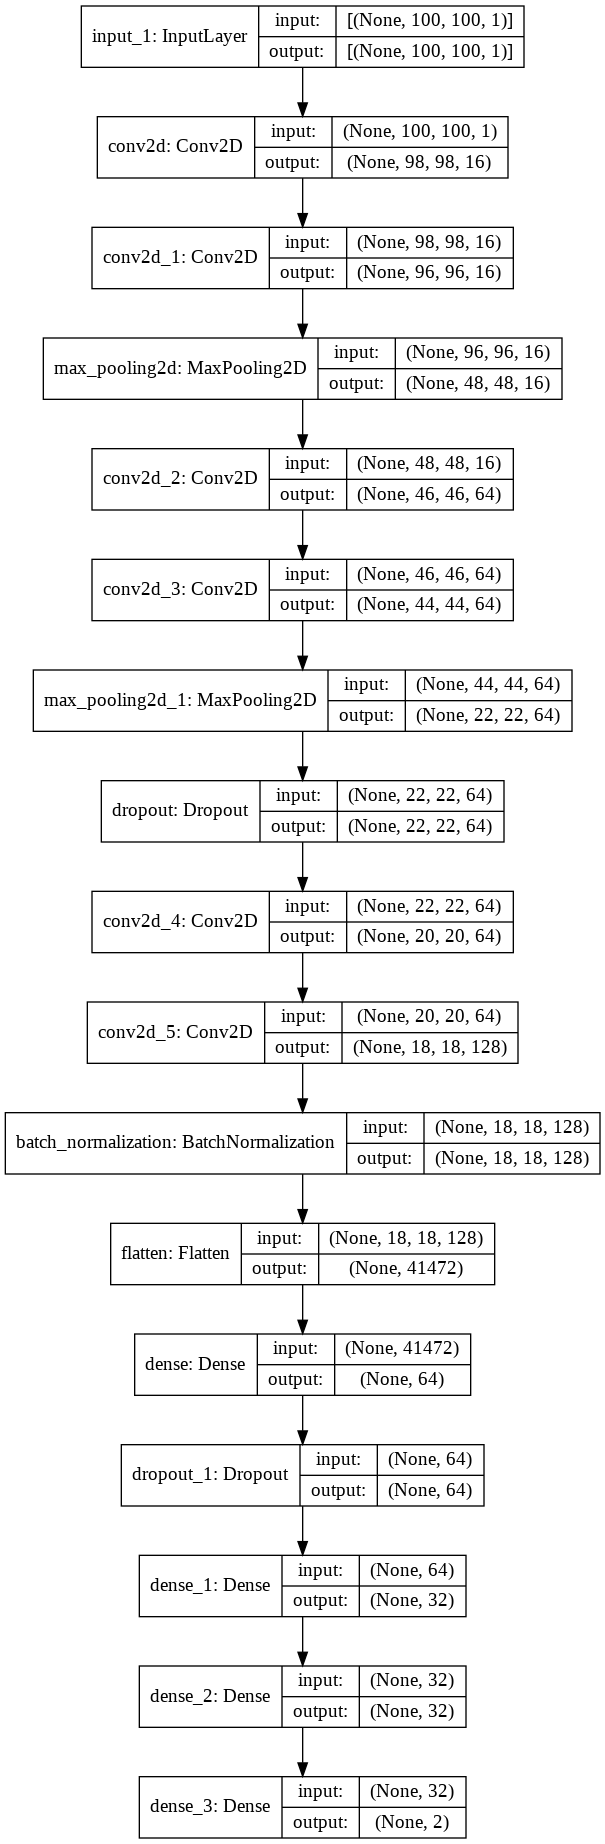

In [65]:
BCKN.clear_session()
model = model_autis_v01((100,100,1), 2)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [57]:
BCKN.clear_session()
model = FCNN_L(shape, num_classes)
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
re_lu (ReLU)                 (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        1040      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        9280  

In [59]:
BCKN.clear_session()
model = FCNN(shape, num_classes)
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
re_lu (ReLU)                 (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        1040      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        9280  

In [10]:
def MobNet (shape, num_classes, alpha=1, ro=1, filter_one=32):

  #alpha should be 1/4, 1/2, 3/4, 1
  #basically between 0 and 1
  #it is a reduce multiplyer of net arcitecture
  #ro is reduce multiplyer of input image
  #also between 0 and 1

  #also additionally we included the number of filters to begin with
  #instead of 32 we can put another minimum 16 and then we grow it like 2**n

  #remember to reshape the image accordingly

  #block that puts batch normalization and relu
  #because we are tired of writing it each time
  def BNR(model):
    model = BN() (model)
    model = ReLU() (model)
    return model

  #standart block
  #you guessed it each convolution is proceeded with
  #batch normalization and linear rectifier relu
  def CBNR(model, filters, kernal, stride=1, padd='same'):
    model = Conv2D (filters, kernal, strides=stride, padding=padd) (model)
    model = BNR(model)
    return model

  #combo block
  #deepwise convolution, in this way we save computational potency
  #instead of one big convolutional block we brake it into two
  #the first one is deepwise second is simple convolution
  #less coeficients appear in this way
  #too bad we did not perserve time to play with permute in all these exercises
  #first convolution as easch convolution in this method
  #is proceeded with batch normalization and relu
  #and standart block inside
  #we mean look at the name
  #it is very self explainatory DCBNRCBNR
  #for those to whom it is hard to read this
  #we put a down underline separator
  def DCBNR_CBNR(model, filters, stride=1, padd='same'):
    model = DepthwiseConv2D(3, strides=stride, padding=padd) (model)
    model = BNR(model)
    model = CBNR(model, filters, 1)
    return model

  #we fill the arcitecture of light net
  def fill(alpha=1, filters=32):
    new_list = []
    if filters<16:
      filters = 32
    if alpha<=0 or 1<alpha:
        alpha=0.5
    for n in range(6):
        new_list.append(int(filters*alpha*2** n))
    return new_list

  if ro<=0 or 1<ro:
    ro=0.5
  tmp=list(int(s*ro) for s in shape[:-1])
  tmp.append(shape[-1])
  shape=tuple(tmp)

  first = Input(shape)
  #arch stends for arcitecture
  arch = fill(alpha, filter_one)
  #it seems like we can imagine a better automatization
  #like one complex cycle
  #because number of filters frows in a simple row a(n)=2^n
  #but at this point we have not figured out it
  #and from another point of view it is more readable
  #and corelates strongly to paper table
  model = CBNR(first, arch[0], 7, 2)
  model = DCBNR_CBNR(model, arch[1])
  model = DCBNR_CBNR(model, arch[2], 2)
  model = DCBNR_CBNR(model, arch[2])
  model = DCBNR_CBNR(model, arch[3], 2)
  model = DCBNR_CBNR(model, arch[3])
  model = DCBNR_CBNR(model, arch[4], 2)
  for _ in range (5):
    model = DCBNR_CBNR(model, arch[4])
  model = DCBNR_CBNR(model, arch[5], 2)
  #this one is strange. in the paper it is said to have stride step 2
  #but the dimentions say it has to have stride = 1
  model = DCBNR_CBNR(model, arch[5])

  #tail
  model = GlobalAveragePooling2D() (model)
  model = Dense(num_classes) (model)
  last = Softmax() (model)
  final = Model(first, last)

  return final

In [11]:
shape = (100, 100, 1)
num_classes = 2
alpha=0.25
romashka=0.5
first=16
BCKN.clear_session()
model = MobNet(shape, num_classes, alpha, romashka, first)
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 4)         200       
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 4)         16        
_________________________________________________________________
re_lu (ReLU)                 (None, 25, 25, 4)         0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 25, 25, 4)         40        
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 4)         16        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 25, 25, 4)         0     

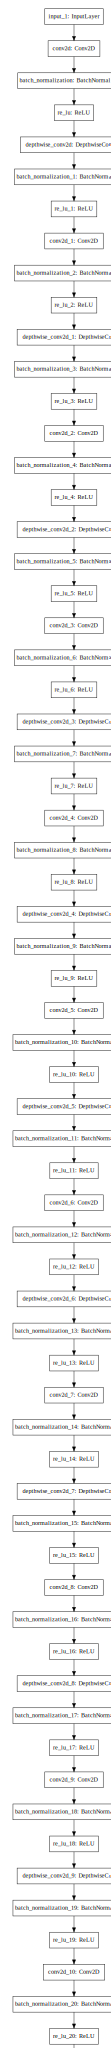

In [13]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
DATA_PATH = '/content/drive/MyDrive/DefectDetection/100x100/'
d_b = DATA_PATH + 'blue/'
d_r = DATA_PATH + 'red/'

def fileList(source):
    matches = []
    for root, dirnames, filenames in os.walk(source):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg')):
                matches.append(os.path.join(root, filename))
    return matches

In [23]:
l_r = fileList(d_r)
l_b = fileList(l_r[o])

/content/drive/MyDrive/DefectDetection/100x100/red/resultado3_1104_dilate15_7x7_cut8.png


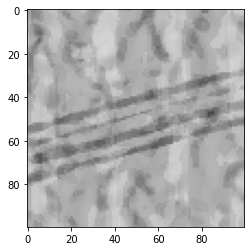

In [31]:
print(l_r[0])
img = cv2.imread(l_r[0])
plt.imshow(img, cmap='gray')
plt.show()

In [26]:
def gen_set(adrs):
  for f in adrs:
    img = cv2.imread(adrs)
    x.append(img)
  return x

In [27]:
X = gen_set(l_r)
print(X[0])

SystemError: ignored